In [97]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')


from collections import Counter
import plotly.express as px

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns


sns.set(style="darkgrid")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91626\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91626\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [98]:
dfs = pd.read_csv('Covid-19 Twitter Dataset (Apr-Jun 2021).csv')
dfs.head()

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
0,1386694264550270000,2021-04-26,"<a href=""http://twitter.com/download/android"" ...",RT @VP: The U.S. is working closely with the I...,en,0.0,0.0,jfd4humanrights,NaN,VP,Alabama,work close indian govern rapidli deploy addit...,0.0772,0.170,0.638,0.191,pos
1,1386694260213170000,2021-04-26,"<a href=""http://twitter.com/download/iphone"" r...",RT @JackPosobiec: Flip-Flop Fauci admits outdo...,en,0.0,0.0,andgrateful,NaN,JackPosobiec,NaN,flip flop fauci admit outdoor covid19 transmis...,-0.4019,0.398,0.442,0.159,neg
2,1386694256413320000,2021-04-26,"<a href=""http://twitter.com/download/iphone"" r...","RT @timmy315: Hi Twitter, I’m Tim Manning, the...",en,0.0,252.0,jlreader8B,NaN,timmy315,NaN,hi twitter tim man white hous covid19 suppli c...,0.0000,0.000,1.000,0.000,neu
3,1386694252017630000,2021-04-26,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @itsaadee: Praying for #India as the countr...,en,0.0,2.0,ijennychauhan,"India, Covid",itsaadee,NaN,pray countri battl worst surg world wit let ir...,-0.4215,0.306,0.522,0.172,neg
4,1386694248284700000,2021-04-26,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Rapid Investment in Nursing to Strengthen the ...,en,0.0,7937.0,IJNSJournal,NaN,NaN,UK,rapid invest nurs strengthen global covid19 re...,0.3182,0.000,0.723,0.277,pos


In [126]:

dfs.head()

,id,created_at,sentiment
0,1386694264550270000,2021-04-26,pos
1,1386694260213170000,2021-04-26,neg
2,1386694256413320000,2021-04-26,neu
3,1386694252017630000,2021-04-26,neg
4,1386694248284700000,2021-04-26,pos


In [100]:
# pixie plot representation of what the final plot should look like #

data_agg = dfs[['id', 'created_at','sentiment']].groupby(['created_at', 'sentiment']).count().reset_index()

data_agg.columns = ['date', 'label','counts']
data_agg.head()

px.line(data_agg, x = 'date', y='counts', color = 'label', title = 'daily tweets sentiment analysis')

In [101]:
df.head(3)

,id,created_at,original_text
0,1386694264550270000,2021-04-26,RT @VP: The U.S. is working closely with the I...
1,1386694260213170000,2021-04-26,RT @JackPosobiec: Flip-Flop Fauci admits outdo...
2,1386694256413320000,2021-04-26,"RT @timmy315: Hi Twitter, I’m Tim Manning, the..."


In [102]:
df = df[['id','created_at', 'original_text']]

df.head()

,id,created_at,original_text
0,1386694264550270000,2021-04-26,RT @VP: The U.S. is working closely with the I...
1,1386694260213170000,2021-04-26,RT @JackPosobiec: Flip-Flop Fauci admits outdo...
2,1386694256413320000,2021-04-26,"RT @timmy315: Hi Twitter, I’m Tim Manning, the..."
3,1386694252017630000,2021-04-26,RT @itsaadee: Praying for #India as the countr...
4,1386694248284700000,2021-04-26,Rapid Investment in Nursing to Strengthen the ...


In [103]:
texts = dn['original_text']
texts

0         RT @VP: The U.S. is working closely with the I...
1         RT @JackPosobiec: Flip-Flop Fauci admits outdo...
2         RT @timmy315: Hi Twitter, I’m Tim Manning, the...
3         RT @itsaadee: Praying for #India as the countr...
4         Rapid Investment in Nursing to Strengthen the ...
                                ...                        
147470    Just as the northern hemisphere summer season ...
147471    COVID 19 TRENDS 2020-2021 https://t.co/tjKMaht...
147472    Goal is reached: 40 per cent of Chinese get Co...
147473    Covid-19 and Uganda’s looming political crisis...
147474    RT @MirzaNasara: Alhamdolillah, we got our sec...
Name: original_text, Length: 147475, dtype: object

In [104]:
## removing urls ##

remove_url = lambda x : re.sub(r'https\S+', '', str(x))
text_ur = texts.apply(remove_url)
text_ur

0         RT @VP: The U.S. is working closely with the I...
1         RT @JackPosobiec: Flip-Flop Fauci admits outdo...
2         RT @timmy315: Hi Twitter, I’m Tim Manning, the...
3         RT @itsaadee: Praying for #India as the countr...
4         Rapid Investment in Nursing to Strengthen the ...
                                ...                        
147470    Just as the northern hemisphere summer season ...
147471              COVID 19 TRENDS 2020-2021  via @YouTube
147472    Goal is reached: 40 per cent of Chinese get Co...
147473      Covid-19 and Uganda’s looming political crisis 
147474    RT @MirzaNasara: Alhamdolillah, we got our sec...
Name: original_text, Length: 147475, dtype: object

In [105]:
## to lowercase ##

lowerc = lambda x : x.lower()
text_ur_lc = text_ur.apply(lowerc)
text_ur_lc

0         rt @vp: the u.s. is working closely with the i...
1         rt @jackposobiec: flip-flop fauci admits outdo...
2         rt @timmy315: hi twitter, i’m tim manning, the...
3         rt @itsaadee: praying for #india as the countr...
4         rapid investment in nursing to strengthen the ...
                                ...                        
147470    just as the northern hemisphere summer season ...
147471              covid 19 trends 2020-2021  via @youtube
147472    goal is reached: 40 per cent of chinese get co...
147473      covid-19 and uganda’s looming political crisis 
147474    rt @mirzanasara: alhamdolillah, we got our sec...
Name: original_text, Length: 147475, dtype: object

In [106]:
## removing punctuations ##

remove_puncs = lambda x : x.translate(str.maketrans('', '', string.punctuation))
text_ur_lc_rp = text_ur_lc.apply(remove_puncs)
text_ur_lc_rp

0         rt vp the us is working closely with the india...
1         rt jackposobiec flipflop fauci admits outdoor ...
2         rt timmy315 hi twitter i’m tim manning the whi...
3         rt itsaadee praying for india as the country b...
4         rapid investment in nursing to strengthen the ...
                                ...                        
147470    just as the northern hemisphere summer season ...
147471                covid 19 trends 20202021  via youtube
147472    goal is reached 40 per cent of chinese get cov...
147473       covid19 and uganda’s looming political crisis 
147474    rt mirzanasara alhamdolillah we got our second...
Name: original_text, Length: 147475, dtype: object

In [107]:
more_words = ['rt','covid','#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19']
stop_words = set(stopwords.words('English'))
stop_words.update(more_words)

remove_words = lambda x : ' '.join([word for word in x.split() if word not in stop_words])
text_ur_lc_rp_wr = text_ur_lc_rp.apply(remove_words)
text_ur_lc_rp_wr

0         vp us working closely indian government rapidl...
1         jackposobiec flipflop fauci admits outdoor tra...
2         timmy315 hi twitter i’m tim manning white hous...
3         itsaadee praying india country battles worst s...
4         rapid investment nursing strengthen global res...
                                ...                        
147470    northern hemisphere summer season kicks europe...
147471                       19 trends 20202021 via youtube
147472    goal reached 40 per cent chinese get jab end j...
147473                    uganda’s looming political crisis
147474    mirzanasara alhamdolillah got second dose vacc...
Name: original_text, Length: 147475, dtype: object

In [108]:
## creating a list of all words in dataset ##

words_list = [word for line in text_ur_lc_rp_wr for word in line.split()]
words_list[0:5]

['vp', 'us', 'working', 'closely', 'indian']

In [109]:
word_counts = Counter(words_list).most_common(50)
words_df = pd.DataFrame(word_counts)
words_df.columns = ['word', 'frequency']
words_df.head()

,word,frequency
0,vaccine,14235
1,new,11832
2,cases,10078
3,people,7990
4,us,6399


In [110]:
dn.original_text = text_ur_lc_rp_wr
dn.head() 

,id,created_at,original_text
0,1386694264550270000,2021-04-26,vp us working closely indian government rapidl...
1,1386694260213170000,2021-04-26,jackposobiec flipflop fauci admits outdoor tra...
2,1386694256413320000,2021-04-26,timmy315 hi twitter i’m tim manning white hous...
3,1386694252017630000,2021-04-26,itsaadee praying india country battles worst s...
4,1386694248284700000,2021-04-26,rapid investment nursing strengthen global res...


In [111]:
sid = SentimentIntensityAnalyzer()
ps = lambda x : sid.polarity_scores(x)
sentiment_scores = dn.original_text.apply(ps)
sentiment_scores

0         {'neg': 0.099, 'neu': 0.724, 'pos': 0.178, 'co...
1         {'neg': 0.226, 'neu': 0.538, 'pos': 0.237, 'co...
2         {'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'comp...
3         {'neg': 0.368, 'neu': 0.495, 'pos': 0.137, 'co...
4         {'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'comp...
                                ...                        
147470    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
147471    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
147472    {'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...
147473    {'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'comp...
147474    {'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...
Name: original_text, Length: 147475, dtype: object

In [112]:
sentiment_df = pd.DataFrame(data = list(sentiment_scores))
sentiment_df.head()

,neg,neu,pos,compound
0,0.099,0.724,0.178,0.2960
1,0.226,0.538,0.237,0.0258
2,0.128,0.872,0.000,-0.2960
3,0.368,0.495,0.137,-0.6369
4,0.000,0.685,0.315,0.3182


In [113]:
labelize = lambda x : 'neu' if x==0 else('pos' if x>0 else 'neg')
sentiment_df['label'] = sentiment_df.compound.apply(labelize)
sentiment_df.head()

,neg,neu,pos,compound,label
0,0.099,0.724,0.178,0.2960,pos
1,0.226,0.538,0.237,0.0258,pos
2,0.128,0.872,0.000,-0.2960,neg
3,0.368,0.495,0.137,-0.6369,neg
4,0.000,0.685,0.315,0.3182,pos


In [114]:
data = dn.join(sentiment_df.label)
data.head()

,id,created_at,original_text,label
0,1386694264550270000,2021-04-26,vp us working closely indian government rapidl...,pos
1,1386694260213170000,2021-04-26,jackposobiec flipflop fauci admits outdoor tra...,pos
2,1386694256413320000,2021-04-26,timmy315 hi twitter i’m tim manning white hous...,neg
3,1386694252017630000,2021-04-26,itsaadee praying india country battles worst s...,neg
4,1386694248284700000,2021-04-26,rapid investment nursing strengthen global res...,pos


In [115]:
## predicted ##

data_agg1 = data[['id', 'created_at', 'label']].groupby(['created_at', 'label']).count().reset_index()

data_agg1.columns = ['created_at', 'label','counts']
data_agg1.head()

px.line(data_agg1, x = 'created_at', y='counts', color = 'label', title = 'daily tweets sentiment analysis')

In [116]:
## actual ##

data_agg = dfs[['id', 'created_at','sentiment']].groupby(['created_at', 'sentiment']).count().reset_index()

data_agg.columns = ['date', 'label','counts']
data_agg.head()

px.line(data_agg, x = 'date', y='counts', color = 'label', title = 'daily tweets sentiment analysis')

In [127]:

dfs = dfs[['id','created_at','sentiment']]
dfs.head(2)

,id,created_at,sentiment
0,1386694264550270000,2021-04-26,pos
1,1386694260213170000,2021-04-26,neg


In [118]:
## predicted dataset ##
data.head()

,id,created_at,original_text,label
0,1386694264550270000,2021-04-26,vp us working closely indian government rapidl...,pos
1,1386694260213170000,2021-04-26,jackposobiec flipflop fauci admits outdoor tra...,pos
2,1386694256413320000,2021-04-26,timmy315 hi twitter i’m tim manning white hous...,neg
3,1386694252017630000,2021-04-26,itsaadee praying india country battles worst s...,neg
4,1386694248284700000,2021-04-26,rapid investment nursing strengthen global res...,pos


In [119]:
## actual dataset ##
dfs.head()

,id,created_at,sentiment
0,1386694264550270000,2021-04-26,pos
1,1386694260213170000,2021-04-26,neg
2,1386694256413320000,2021-04-26,neu
3,1386694252017630000,2021-04-26,neg
4,1386694248284700000,2021-04-26,pos


In [120]:
testing_acc = np.asarray((data.label, dfs.sentiment))
testing_acc[0:5]

array([['pos', 'pos', 'neg', ..., 'pos', 'neg', 'pos'],
       ['pos', 'neg', 'neu', ..., 'pos', 'neg', 'pos']], dtype=object)

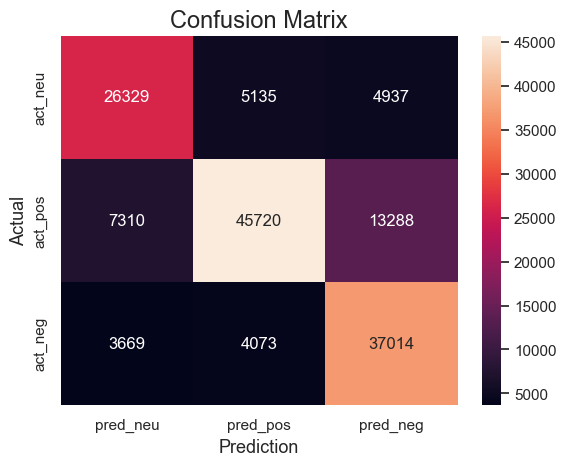

In [121]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

cm = confusion_matrix(testing_acc[1], testing_acc[0])

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            yticklabels=['act_neu','act_pos','act_neg'],
            xticklabels=['pred_neu','pred_pos','pred_neg'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [122]:
print(classification_report(testing_acc[1], testing_acc[0]))

              precision    recall  f1-score   support

         neg       0.71      0.72      0.71     36401
         neu       0.83      0.69      0.75     66318
         pos       0.67      0.83      0.74     44756

    accuracy                           0.74    147475
   macro avg       0.74      0.75      0.74    147475
weighted avg       0.75      0.74      0.74    147475

